# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q='
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | birmitrapur
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | songea
Processing Record 8 of Set 1 | muynoq
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | kingston
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | zangguy
City not found. Skipping...
Processing Record 16 of Set 1 | nguigmi
Processing Record 17 of Set 1 | gizo
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | shingu
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | wailua homesteads
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,289.97,66,57,3.82,ZA,1698215514
1,ust-nera,64.5667,143.2000,252.38,100,54,0.99,RU,1698215515
2,adamstown,-25.0660,-130.1015,295.62,82,0,4.23,PN,1698215515
3,birmitrapur,22.4000,84.7667,303.06,50,21,1.57,IN,1698215516
4,tura,25.5198,90.2201,300.21,72,16,1.00,IN,1698215291


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,289.97,66,57,3.82,ZA,1698215514
1,ust-nera,64.5667,143.2000,252.38,100,54,0.99,RU,1698215515
2,adamstown,-25.0660,-130.1015,295.62,82,0,4.23,PN,1698215515
3,birmitrapur,22.4000,84.7667,303.06,50,21,1.57,IN,1698215516
4,tura,25.5198,90.2201,300.21,72,16,1.00,IN,1698215291


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

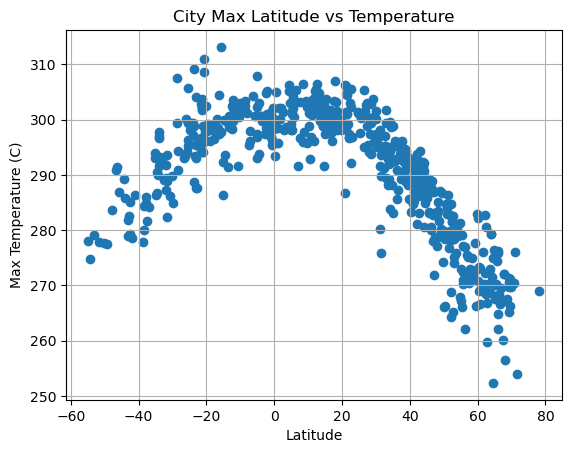

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter (city_data_df['Lat'],city_data_df['Max Temp'],marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

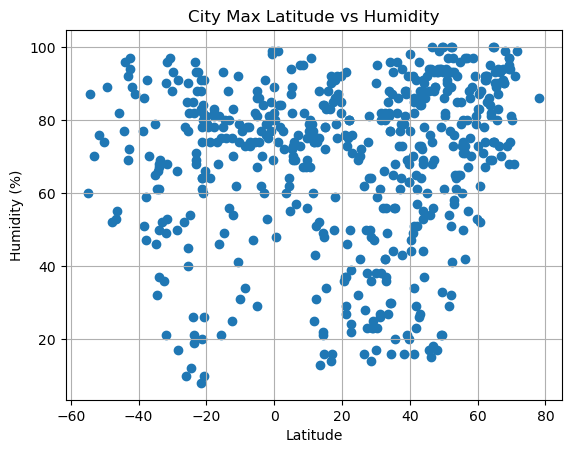

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter (city_data_df['Lat'],city_data_df['Humidity'],marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

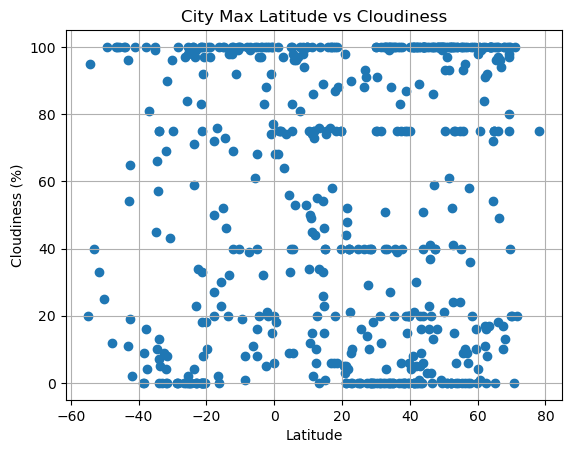

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter (city_data_df['Lat'],city_data_df['Cloudiness'],marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

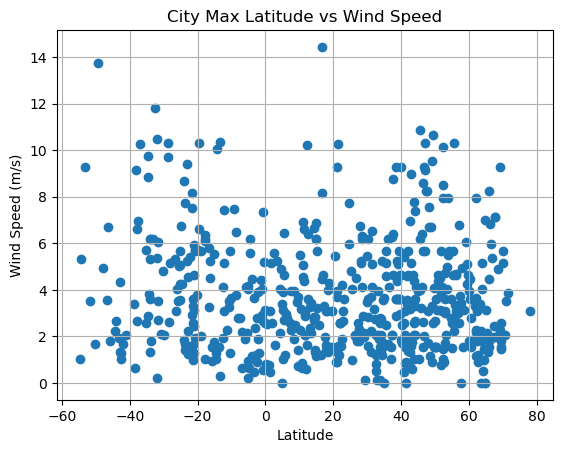

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter (city_data_df['Lat'],city_data_df['Wind Speed'],marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def perform_linear_regression (data_frame,x_column,y_column):
    x= data_frame[x_column].values.reshape(-1,1)
    y= data_frame[y_column].values
    model=LinearRegression()
    model.fit(x,y)
    y_pred = model.predict(x)
    r_squared=r2_score(y,y_pred)
    regression_equation = f'y={model.coef_[0]:.2f} * x + {model.intercept_:.2f}'

    return x, y, y_pred, model, r_squared, regression_equation

def plot_linear_regression(x,y,y_pred,x_label,y_label,r_squared,regression_equation):
    plt.scatter(x,y,label='Data Points')
    plt.plot(x,y_pred,color='r',label= 'Linear Regression Line')
    plt.text(max(x)* 0.2, max(y)*0.9, f'r_value = {r_squared:.2f}',color='r')
    plt.text(max(x)* 0.6, max(y)*0.95, regression_equation,color='r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ust-nera,64.5667,143.2000,252.38,100,54,0.99,RU,1698215515
3,birmitrapur,22.4000,84.7667,303.06,50,21,1.57,IN,1698215516
4,tura,25.5198,90.2201,300.21,72,16,1.00,IN,1698215291
6,muynoq,43.7683,59.0214,291.50,53,100,4.39,UZ,1698215517
10,kingston,17.9970,-76.7936,300.68,91,20,3.09,JM,1698215518


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,289.97,66,57,3.82,ZA,1698215514
2,adamstown,-25.0660,-130.1015,295.62,82,0,4.23,PN,1698215515
5,songea,-10.6833,35.6500,300.81,41,99,3.54,TZ,1698215516
7,puerto natales,-51.7236,-72.4875,277.95,76,33,3.52,CL,1698215517
8,port-aux-francais,-49.3500,70.2167,277.50,89,100,13.77,TF,1698215248


###  Temperature vs. Latitude Linear Regression Plot

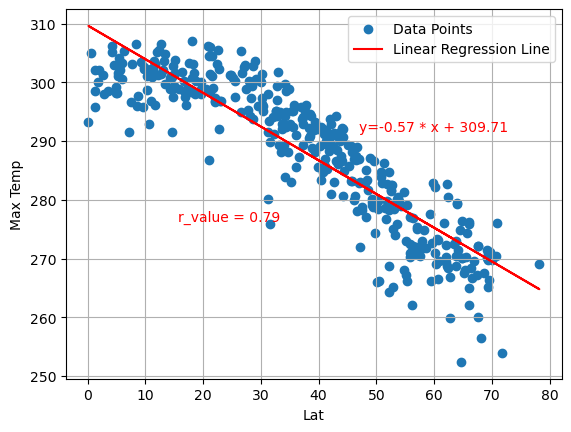

the r_value = 0.79437133624669


In [74]:
# Linear regression on Northern Hemisphere
data_frame = northern_hemi_df
x_new= 'Lat'
y_new='Max Temp'

# to call the perform_linear_regression fuction:
x_new,y_new,y_pred_new,model_new,r_squared,regression_equation= perform_linear_regression(northern_hemi_df,'Lat','Max Temp')

plot_linear_regression(x_new,y_new,y_pred_new,'Lat','Max Temp',r_squared, regression_equation)
print(f'the r_value = {r_squared}')


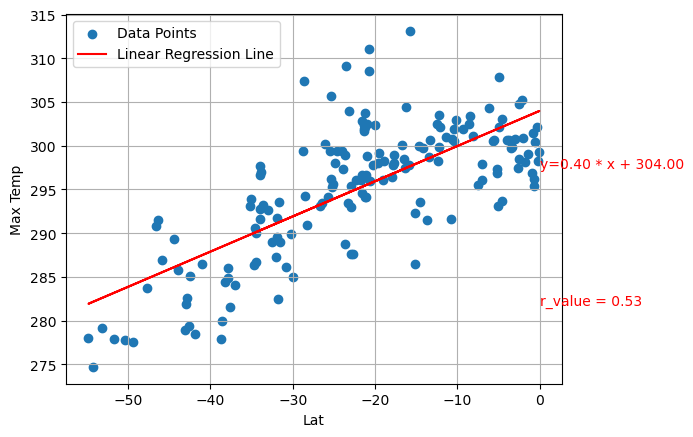

the r_squared = 0.5314627117380089


In [75]:
# Linear regression on Southern Hemisphere
x_new= 'Lat'
y_new='Max Temp'

# to call the perform_linear_regression fuction:
x_new,y_new,y_pred_new,model_new,r_squared,regression_equation= perform_linear_regression(southern_hemi_df,'Lat','Max Temp')

plot_linear_regression(x_new,y_new,y_pred_new,'Lat','Max Temp',r_squared, regression_equation)
print(f'the r_squared = {r_squared}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisferio, the relation is inversely proportional, if the latitud increase the temperature decrease. 

However the behavor on the surthern hemisferio, is directly proportional, if the latitud increase the temperature increase too.

### Humidity vs. Latitude Linear Regression Plot

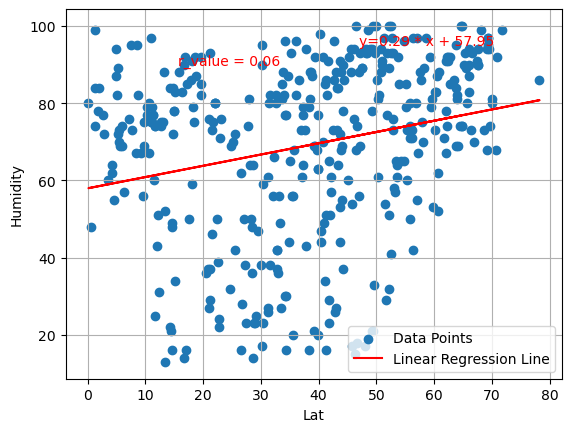

the r_value = 0.05827485987281078


In [79]:
# Northern Hemisphere
data_frame = northern_hemi_df
x_new= 'Lat'
y_new='Humidity'

# to call the perform_linear_regression fuction:
x_new,y_new,y_pred_new,model_new,r_squared,regression_equation= perform_linear_regression(northern_hemi_df,'Lat','Humidity')

plot_linear_regression(x_new,y_new,y_pred_new,'Lat','Humidity',r_squared, regression_equation)
print(f'the r_value = {r_squared}')

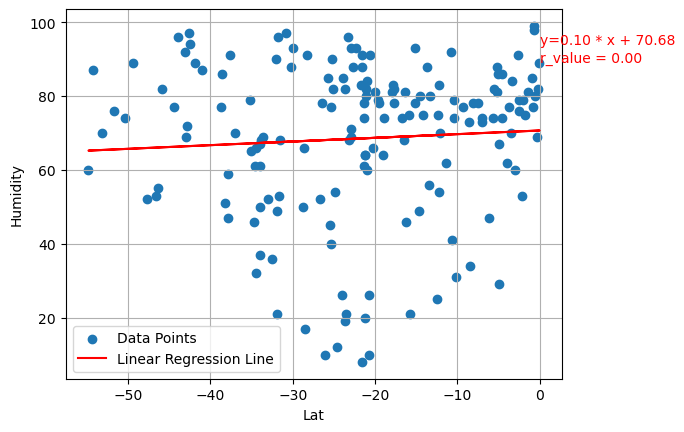

the r_squared = 0.004139641109518255


In [83]:
# Southern Hemisphere
x_n= 'Lat'
y_n='Humidity'

# to call the perform_linear_regression fuction:
x_new,y_new,y_pred_new,model_new,r_squared,regression_equation= perform_linear_regression(southern_hemi_df,x_n,y_n)

plot_linear_regression(x_new,y_new,y_pred_new,x_n,y_n,r_squared, regression_equation)
print(f'the r_squared = {r_squared}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisferio, the relation is directly proportional, if the latitud increase the temperature increase, but the tendency is higher than the surthern hem. 

However the behavor on the surthern hemisferio, is directly proportional, if the latitud increase the temperature increase too.

### Cloudiness vs. Latitude Linear Regression Plot

the r_value = 0.0039041609749566053


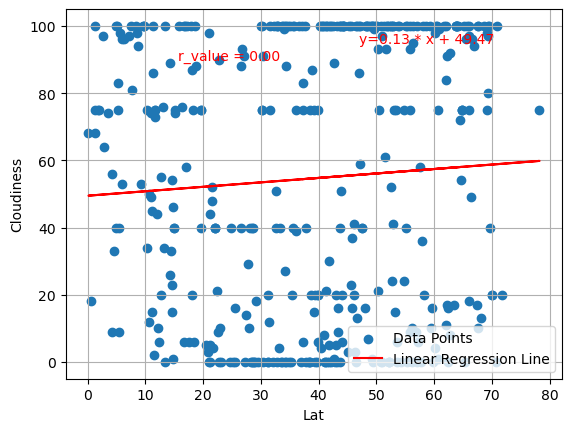

In [82]:
# Northern Hemisphere
data_frame = northern_hemi_df
x_n= 'Lat'
y_n='Cloudiness'

# to call the perform_linear_regression fuction:
x_new,y_new,y_pred_new,model_new,r_squared,regression_equation= perform_linear_regression(northern_hemi_df,x_n,y_n)
print(f'the r_value = {r_squared}')
plot_linear_regression(x_new,y_new,y_pred_new,x_n,y_n,r_squared, regression_equation)


the r_squared = 0.01698283447370441


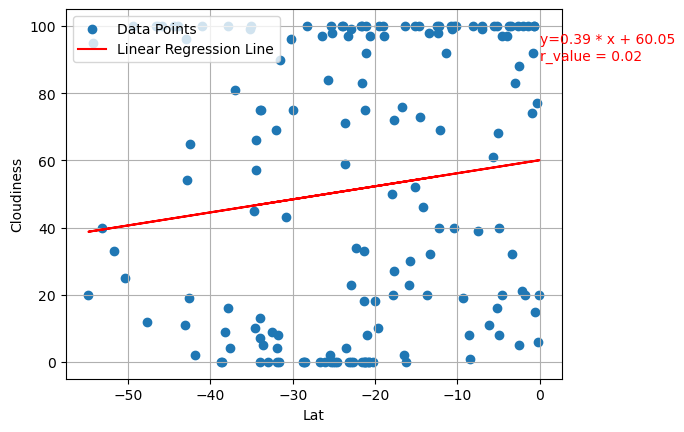

In [85]:
# Southern Hemisphere
x_n= 'Lat'
y_n='Cloudiness'

# to call the perform_linear_regression fuction:
x_new,y_new,y_pred_new,model_new,r_squared,regression_equation= perform_linear_regression(southern_hemi_df,x_n,y_n)
print(f'the r_squared = {r_squared}')
plot_linear_regression(x_new,y_new,y_pred_new,x_n,y_n,r_squared, regression_equation)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisferio, the relation is directly proportional, if the latitud increase the temperature increase, but the tendency is stedier than the surthern hem. 

However the behavor on the surthern hemisferio, is directly proportional, if the latitud increase the temperature increase too.

### Wind Speed vs. Latitude Linear Regression Plot

the r_value = 0.003242185399910169


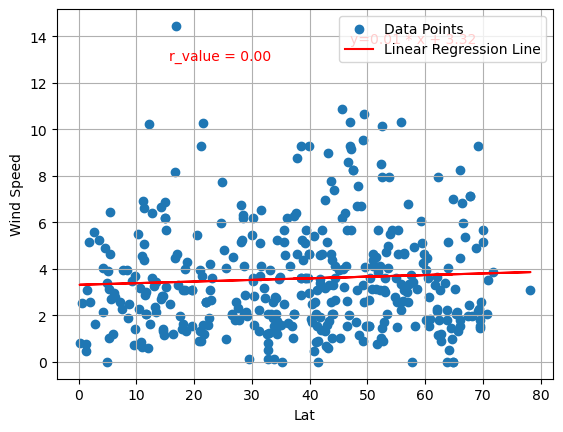

In [89]:
# Northern Hemisphere
data_frame = northern_hemi_df
x_n= 'Lat'
y_n='Wind Speed'

# to call the perform_linear_regression fuction:
x_new,y_new,y_pred_new,model_new,r_squared,regression_equation= perform_linear_regression(northern_hemi_df,x_n,y_n)
print(f'the r_value = {r_squared}')
plot_linear_regression(x_new,y_new,y_pred_new,x_n,y_n,r_squared, regression_equation)

the r_squared = 0.03575984054489201


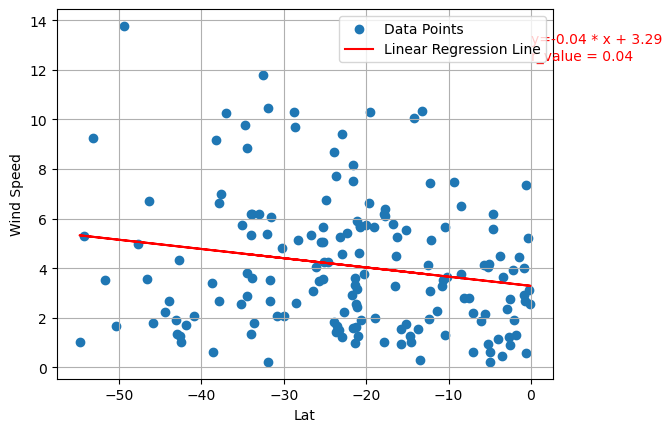

In [88]:
# Southern Hemisphere
x_n= 'Lat'
y_n='Wind Speed'

# to call the perform_linear_regression fuction:
x_new,y_new,y_pred_new,model_new,r_squared,regression_equation= perform_linear_regression(southern_hemi_df,x_n,y_n)

print(f'the r_squared = {r_squared}')
plot_linear_regression(x_new,y_new,y_pred_new,x_n,y_n,r_squared, regression_equation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisferio, the relation is directly proportional, if the latitud increase the temperature increase, but the tendency is steddy. 

However the behavor on the surthern hemisferio, is indirectly proportional, if the latitud increase the temperature decrease.